CUBIC SPLINE INTERPOLATION - HW01 TASK 2
GENERATING 100 INTERPOLATED POINTS FROM 10 ORIGINAL POINTS

📂 Reading data from:
   D:\Physics\Computational Physics and Astrophysics\interpolation\HW01_data.txt

✓ Data loaded successfully!
  Number of original points: 10
  x domain: [-1.0, 8.0]
  y range: [-3.0, 4.0]

────────────────────────Interpolation Process─────────────────────────
  Target resolution: 10x
  Number of points to generate: 100
  Interpolation method: Cubic Spline
  Spacing between points: Δx = 0.090909

  Applying cubic spline interpolation...
  Method: Piecewise cubic polynomials with continuity constraints

✓ Cubic spline interpolation completed!
  Generated 100 interpolated y-values

  Calculating linear interpolation using SID ...
  Method: Formula-based linear interpolation (no np.interp)
✓ Linear interpolation (Sid) completed for reference

──────────────────────Sample Interpolated Values──────────────────────
     x |    Cubic Spline |    Linear (Sid) |      Differe

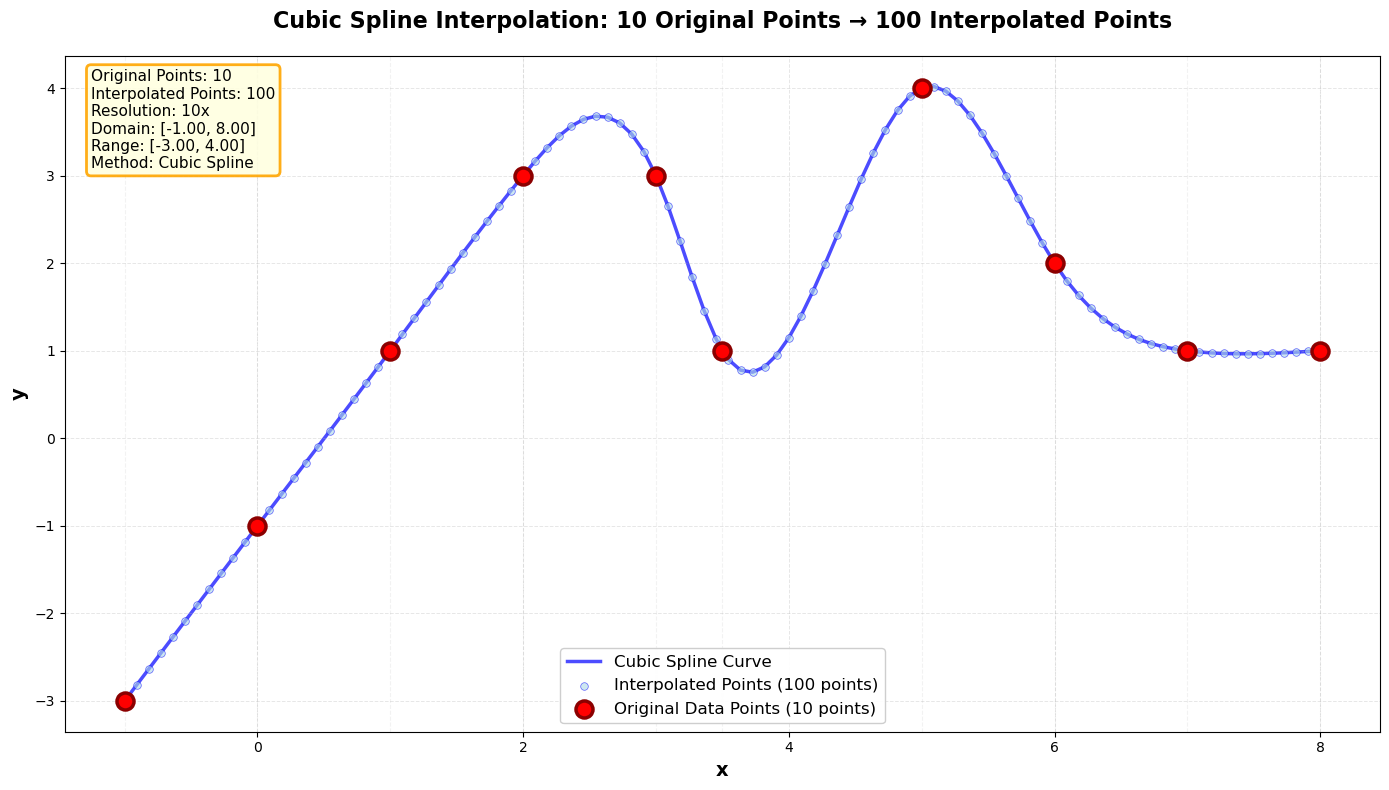

  ✓ Plot 1 displayed
  Creating Plot 2: Full view + zoomed detail...


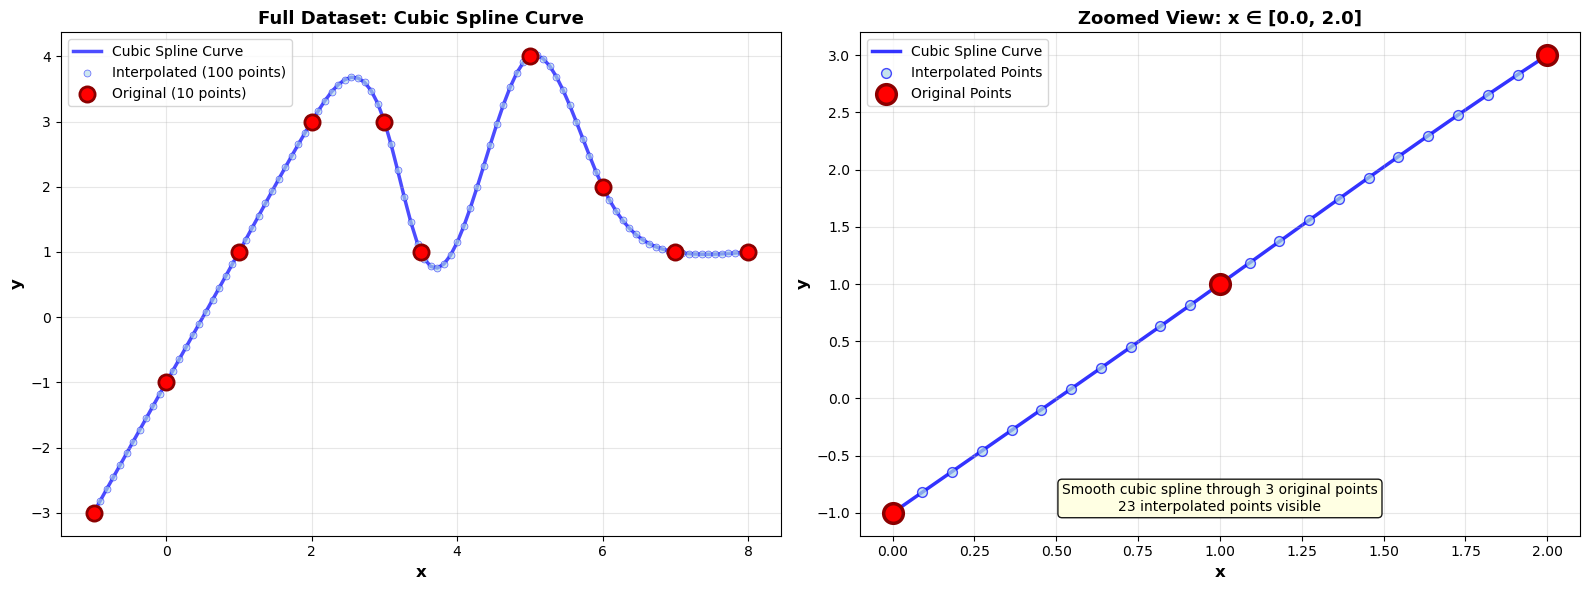

  ✓ Plot 2 displayed
  Creating Plot 3: Linear (Sid) vs Cubic comparison...


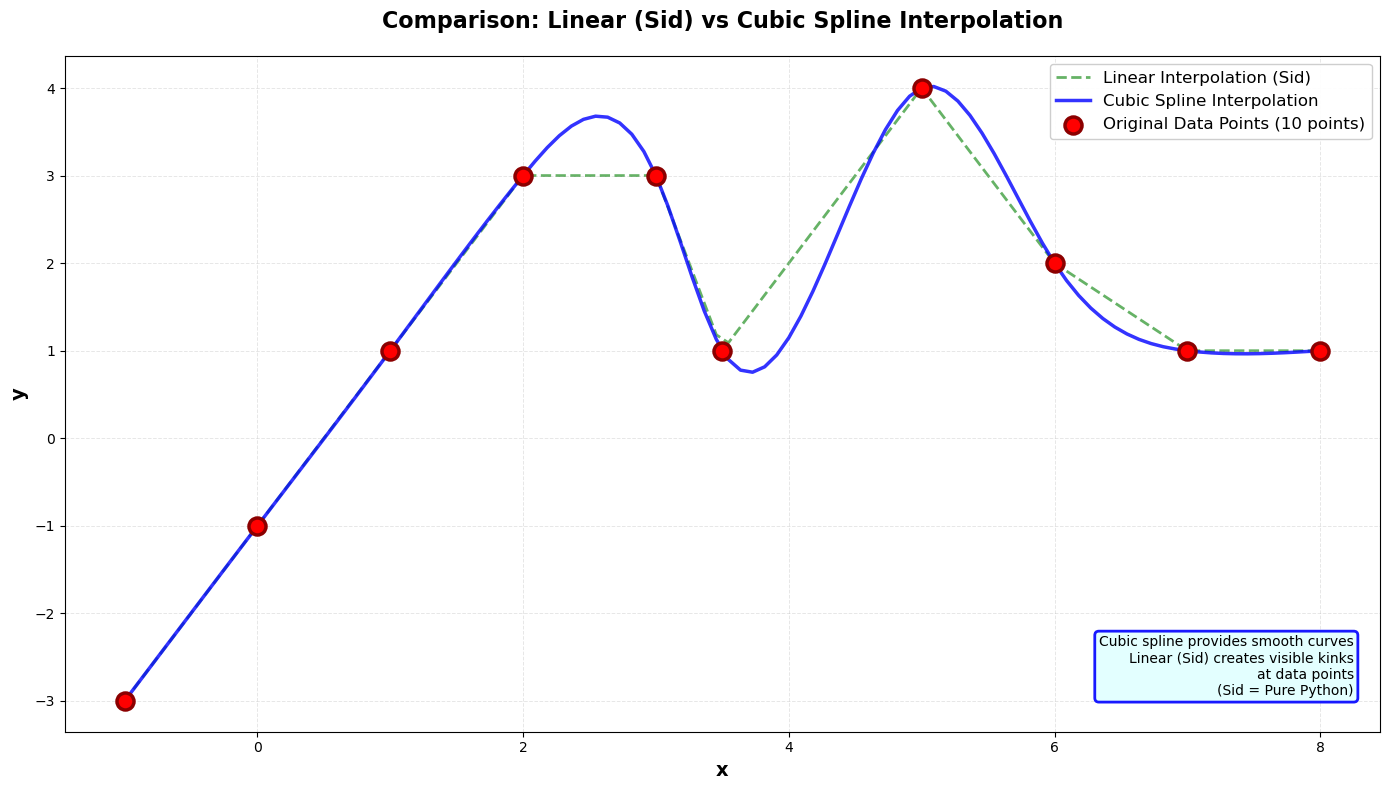

  ✓ Plot 3 displayed

──────────────────────────────Statistics──────────────────────────────
  Difference between cubic spline and linear (Sid):
    Mean difference: 0.17272067
    Max difference:  0.86679271
    Min difference:  0.00000000

  Smoothness (second derivative variance):
    Cubic spline:   0.00127005
    Linear (Sid):   0.00471911
    (Lower = smoother)

───────────────────────────────Summary────────────────────────────────
  ✓ Original data points: 10
  ✓ Interpolated points: 100
  ✓ Resolution increase: 10x
  ✓ Method: Cubic Spline Interpolation
  ✓ Comparison method: Linear (Sid)
  ✓ Boundary condition: Natural spline (2nd derivative = 0 at endpoints)
  ✓ Display mode: Inline only (no files saved)

TASK COMPLETED SUCCESSFULLY!

Cubic spline interpolation benefits:
  • Smooth curves with continuous derivatives
  • No visible kinks at data points (unlike linear)
  • Better approximation for smooth functions
  • Maintains overall shape of the data

Linear interpolation (S

In [1]:
"""
Cubic Spline Interpolation Implementation for HW01 - Task 2
Author: Solution for Computational Physics Assignment
Date: February 2026

This script implements cubic spline interpolation to generate 100 interpolated points
from 10 original data points, achieving 10x resolution increase.

JupyterLab DISPLAY ONLY VERSION:
  - Plots display inline in JupyterLab
  - NO files saved to disk
  - Clean notebook output

LINEAR INTERPOLATION METHOD:
  - Uses "Sid" - Pure Python formula-based implementation
  - No np.interp() - Manual calculation for comparison purposes

Features:
  - Reads data from file
  - Generates evenly-spaced query points
  - Performs cubic spline interpolation using SciPy
  - Uses Sid for linear interpolation comparison
  - Creates comprehensive visualizations
  - Shows all interpolated points inline
  - PRINTS simplified advantages/disadvantages (title + description only, NO impacts)

File Path: D:/Physics/Computational Physics and Astrophysics/interpolation/HW01_data.txt
"""

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.interpolate import CubicSpline


# ============================================================================
# INTERPOLATION FUNCTIONS
# ============================================================================

def create_evenly_spaced_points(start, stop, num):
    """
    Generate evenly-spaced numbers over a specified interval.

    Parameters:
    -----------
    start : float
        Starting value
    stop : float
        Ending value
    num : int
        Number of points to generate

    Returns:
    --------
    ndarray : Array of evenly-spaced values
    """
    return np.linspace(start, stop, num)


def read_data_file(file_path):
    """Read data from tab-separated text file."""
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"File not found: {file_path}")

    x_data = []
    y_data = []

    with open(file_path, 'r') as f:
        lines = f.readlines()

    for line in lines[1:]:  # Skip header
        line = line.strip()
        if not line:
            continue
        values = line.split('\t') if '\t' in line else line.split()
        if len(values) >= 2:
            try:
                x_data.append(float(values[0]))
                y_data.append(float(values[1]))
            except ValueError:
                continue

    return np.array(x_data), np.array(y_data)



def cubic_spline_interpolate(x_data, y_data, x_query):
    """
    Perform cubic spline interpolation on data points.

    Cubic spline interpolation divides the domain into segments and fits
    a cubic polynomial (degree 3) within each segment. The polynomials are
    constrained to be continuous and smooth at the segment boundaries.

    Parameters:
    -----------
    x_data : array-like
        x-coordinates of input data points
    y_data : array-like
        y-coordinates of input data points
    x_query : array-like
        x value(s) where interpolation is desired

    Returns:
    --------
    ndarray : Interpolated y value(s)

    Method:
    -------
    1. Uses scipy.interpolate.CubicSpline to create cubic spline object
    2. Evaluates the spline at query points
    3. Returns smooth interpolated values

    Advantages over linear interpolation:
    - Smoother curves (continuous second derivatives)
    - Better approximation of smooth functions
    - No visible corners or kinks at data points
    """
    # Convert to numpy arrays
    x_data = np.asarray(x_data)
    y_data = np.asarray(y_data)
    x_query = np.asarray(x_query)

    # Sort data if necessary
    if not np.all(x_data[:-1] <= x_data[1:]):
        sort_indices = np.argsort(x_data)
        x_data = x_data[sort_indices]
        y_data = y_data[sort_indices]

    # Create cubic spline interpolator
    # bc_type='natural' means second derivative = 0 at endpoints
    spline = CubicSpline(x_data, y_data, bc_type='natural')

    # Evaluate at query points
    y_interp = spline(x_query)

    return y_interp



def linear_interpolate_sid(x_data, y_data, x_query):
    """
    Linear interpolation using SID - Pure Python formula-based approach.
    
    This is the manual implementation that calculates interpolated values
    using the linear interpolation formula WITHOUT using np.interp().
    
    Formula:
    --------
    For a query point x between x_i and x_{i+1}:
        y = y_i + (y_{i+1} - y_i) * (x - x_i) / (x_{i+1} - x_i)
    
    Parameters:
    -----------
    x_data : array-like
        x-coordinates of input data points (must be sorted)
    y_data : array-like
        y-coordinates of input data points
    x_query : array-like
        x value(s) where interpolation is desired
    
    Returns:
    --------
    ndarray : Interpolated y value(s) using linear interpolation
    
    Method:
    -------
    1. For each query point, find the two surrounding data points
    2. Apply linear interpolation formula manually
    3. Handle edge cases (extrapolation at boundaries)
    """
    # Convert to numpy arrays for consistency
    x_data = np.asarray(x_data)
    y_data = np.asarray(y_data)
    x_query = np.asarray(x_query)
    
    # Ensure x_data is sorted
    if not np.all(x_data[:-1] <= x_data[1:]):
        sort_indices = np.argsort(x_data)
        x_data = x_data[sort_indices]
        y_data = y_data[sort_indices]
    
    # Initialize result array
    y_interp = np.zeros_like(x_query, dtype=float)
    
    # Process each query point individually
    for idx, x in enumerate(x_query):
        # Handle extrapolation below range
        if x <= x_data[0]:
            y_interp[idx] = y_data[0]
            continue
        
        # Handle extrapolation above range
        if x >= x_data[-1]:
            y_interp[idx] = y_data[-1]
            continue
        
        # Find the interval containing x
        # We need to find i such that x_data[i] <= x < x_data[i+1]
        for i in range(len(x_data) - 1):
            if x_data[i] <= x <= x_data[i + 1]:
                # Found the interval! Apply linear interpolation formula
                x0 = x_data[i]
                x1 = x_data[i + 1]
                y0 = y_data[i]
                y1 = y_data[i + 1]
                
                # Linear interpolation formula:
                # y = y0 + (y1 - y0) * (x - x0) / (x1 - x0)
                y_interp[idx] = y0 + (y1 - y0) * (x - x0) / (x1 - x0)
                break
    
    return y_interp



# ============================================================================
# MAIN EXECUTION
# ============================================================================

file_path = r'D:\Physics\Computational Physics and Astrophysics\interpolation\HW01_data.txt'

print("="*70)
print("CUBIC SPLINE INTERPOLATION - HW01 TASK 2")
print("GENERATING 100 INTERPOLATED POINTS FROM 10 ORIGINAL POINTS")
print("="*70)

# Read original data
print(f"\n📂 Reading data from:\n   {file_path}")

try:
    x_original, y_original = read_data_file(file_path)
except FileNotFoundError as e:
    print(f"\n❌ Error: {e}")
    raise

print(f"\n✓ Data loaded successfully!")
print(f"  Number of original points: {len(x_original)}")
print(f"  x domain: [{np.min(x_original)}, {np.max(x_original)}]")
print(f"  y range: [{np.min(y_original)}, {np.max(y_original)}]")

# Calculate parameters for interpolation
n_original = len(x_original)
resolution_multiplier = 10
n_interpolated = n_original * resolution_multiplier

print(f"\n{'Interpolation Process':─^70}")
print(f"  Target resolution: {resolution_multiplier}x")
print(f"  Number of points to generate: {n_interpolated}")
print(f"  Interpolation method: Cubic Spline")

# Step 1: Generate evenly-spaced x-values
x_interp = create_evenly_spaced_points(np.min(x_original), np.max(x_original), n_interpolated)
spacing = (np.max(x_original) - np.min(x_original)) / (n_interpolated - 1)
print(f"  Spacing between points: Δx = {spacing:.6f}")

# Step 2: Calculate y-values using cubic spline
print(f"\n  Applying cubic spline interpolation...")
print(f"  Method: Piecewise cubic polynomials with continuity constraints")

y_cubic = cubic_spline_interpolate(x_original, y_original, x_interp)

print(f"\n✓ Cubic spline interpolation completed!")
print(f"  Generated {len(y_cubic)} interpolated y-values")

# Step 3: Calculate linear interpolation using Sid for comparison
print(f"\n  Calculating linear interpolation using SID ...")
print(f"  Method: Formula-based linear interpolation (no np.interp)")

y_linear = linear_interpolate_sid(x_original, y_original, x_interp)

print(f"✓ Linear interpolation (Sid) completed for reference")

# Test specific values
print(f"\n{'Sample Interpolated Values':─^70}")
test_x = np.array([0.5, 1.5, 4.0, 6.5])
test_y_cubic = cubic_spline_interpolate(x_original, y_original, test_x)
test_y_linear = linear_interpolate_sid(x_original, y_original, test_x)

print(f"{'x':>6} | {'Cubic Spline':>15} | {'Linear (Sid)':>15} | {'Difference':>15}")
print(f"{'-'*70}")
for i, tx in enumerate(test_x):
    diff = test_y_cubic[i] - test_y_linear[i]
    print(f"{tx:6.2f} | {test_y_cubic[i]:15.6f} | {test_y_linear[i]:15.6f} | {diff:15.6f}")

# ============================================================================
# PLOT 1: MAIN CUBIC SPLINE VISUALIZATION
# ============================================================================

print(f"\n{'Creating Visualizations':─^70}")
print("  Creating Plot 1: Main cubic spline...")

fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(x_interp, y_cubic, 'b-', linewidth=2.5, alpha=0.7, 
        label='Cubic Spline Curve', zorder=1)
ax.scatter(x_interp, y_cubic, color='lightblue', s=30, 
           label=f'Interpolated Points ({len(x_interp)} points)', 
           zorder=2, alpha=0.6, edgecolors='blue', linewidths=0.5)
ax.scatter(x_original, y_original, color='red', s=150, 
           label=f'Original Data Points ({len(x_original)} points)', 
           zorder=3, edgecolors='darkred', linewidths=2.5, marker='o')

for i in range(len(x_original)):
    ax.axvline(x=x_original[i], color='gray', alpha=0.1, linestyle='--', linewidth=0.8)

ax.set_xlabel('x', fontsize=14, fontweight='bold')
ax.set_ylabel('y', fontsize=14, fontweight='bold')
ax.set_title(f'Cubic Spline Interpolation: {len(x_original)} Original Points → {len(x_interp)} Interpolated Points', 
             fontsize=16, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.7)
ax.legend(loc='best', fontsize=12, framealpha=0.95)

x_min_val = np.min(x_original)
x_max_val = np.max(x_original)
y_min_val = np.min(y_original)
y_max_val = np.max(y_original)

stats_text = (
    f'Original Points: {len(x_original)}\n'
    f'Interpolated Points: {len(x_interp)}\n'
    f'Resolution: {len(x_interp)//len(x_original)}x\n'
    f'Domain: [{x_min_val:.2f}, {x_max_val:.2f}]\n'
    f'Range: [{y_min_val:.2f}, {y_max_val:.2f}]\n'
    f'Method: Cubic Spline'
)
ax.text(0.02, 0.98, stats_text, transform=ax.transAxes,
        fontsize=11, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.9, 
                 edgecolor='orange', linewidth=2))

plt.tight_layout()
plt.show()
print("  ✓ Plot 1 displayed")

# ============================================================================
# PLOT 2: COMPARISON WITH ZOOM
# ============================================================================

print("  Creating Plot 2: Full view + zoomed detail...")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# LEFT: Full view
ax1.plot(x_interp, y_cubic, 'b-', linewidth=2.5, alpha=0.7, 
         label='Cubic Spline Curve', zorder=1)
ax1.scatter(x_interp, y_cubic, color='lightblue', s=25, 
            label=f'Interpolated ({len(x_interp)} points)', 
            zorder=2, alpha=0.6, edgecolors='blue', linewidths=0.5)
ax1.scatter(x_original, y_original, color='red', s=120, 
            label=f'Original ({len(x_original)} points)', 
            zorder=3, edgecolors='darkred', linewidths=2, marker='o')

ax1.set_xlabel('x', fontsize=12, fontweight='bold')
ax1.set_ylabel('y', fontsize=12, fontweight='bold')
ax1.set_title('Full Dataset: Cubic Spline Curve', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=10)

# RIGHT: Zoomed view [0, 2]
zoom_xmin, zoom_xmax = 0.0, 2.0

mask_interp = (x_interp >= zoom_xmin) & (x_interp <= zoom_xmax)
x_zoom_interp = x_interp[mask_interp]
y_zoom_interp = y_cubic[mask_interp]

mask_orig = (x_original >= zoom_xmin) & (x_original <= zoom_xmax)
x_zoom_orig = x_original[mask_orig]
y_zoom_orig = y_original[mask_orig]

ax2.plot(x_zoom_interp, y_zoom_interp, 'b-', linewidth=2.5, alpha=0.8, 
         label='Cubic Spline Curve', zorder=1)
ax2.scatter(x_zoom_interp, y_zoom_interp, color='lightblue', s=50, 
            label=f'Interpolated Points', 
            zorder=2, alpha=0.7, edgecolors='blue', linewidths=1)
ax2.scatter(x_zoom_orig, y_zoom_orig, color='red', s=200, 
            label=f'Original Points', 
            zorder=3, edgecolors='darkred', linewidths=2.5, marker='o')

ax2.set_xlabel('x', fontsize=12, fontweight='bold')
ax2.set_ylabel('y', fontsize=12, fontweight='bold')
ax2.set_title(f'Zoomed View: x ∈ [{zoom_xmin}, {zoom_xmax}]', 
              fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=10)

n_points_segment = np.sum(mask_interp)
ax2.text(0.5, 0.05, 
         f'Smooth cubic spline through {len(x_zoom_orig)} original points\n'
         f'{n_points_segment} interpolated points visible',
         transform=ax2.transAxes, fontsize=10,
         bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.9),
         horizontalalignment='center')

plt.tight_layout()
plt.show()
print("  ✓ Plot 2 displayed")

# ============================================================================
# PLOT 3: LINEAR (SID) VS CUBIC COMPARISON
# ============================================================================

print("  Creating Plot 3: Linear (Sid) vs Cubic comparison...")

fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(x_interp, y_linear, 'g--', linewidth=2, alpha=0.6, 
        label='Linear Interpolation (Sid)', zorder=1)
ax.plot(x_interp, y_cubic, 'b-', linewidth=2.5, alpha=0.8, 
        label='Cubic Spline Interpolation', zorder=2)
ax.scatter(x_original, y_original, color='red', s=150, 
           label=f'Original Data Points ({len(x_original)} points)', 
           zorder=3, edgecolors='darkred', linewidths=2.5, marker='o')

ax.set_xlabel('x', fontsize=14, fontweight='bold')
ax.set_ylabel('y', fontsize=14, fontweight='bold')
ax.set_title('Comparison: Linear (Sid) vs Cubic Spline Interpolation', 
             fontsize=16, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.7)
ax.legend(loc='best', fontsize=12, framealpha=0.95)

desc_text = (
    'Cubic spline provides smooth curves\n'
    'Linear (Sid) creates visible kinks\n'
    'at data points\n'
    '(Sid = Pure Python)'
)
ax.text(0.98, 0.05, desc_text, transform=ax.transAxes,
        fontsize=10, verticalalignment='bottom', horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='lightcyan', alpha=0.9, 
                 edgecolor='blue', linewidth=2))

plt.tight_layout()
plt.show()
print("  ✓ Plot 3 displayed")

# ============================================================================
# STATISTICS
# ============================================================================

print(f"\n{'Statistics':─^70}")

diff_methods = np.abs(y_cubic - y_linear)
print(f"  Difference between cubic spline and linear (Sid):")
print(f"    Mean difference: {np.mean(diff_methods):.8f}")
print(f"    Max difference:  {np.max(diff_methods):.8f}")
print(f"    Min difference:  {np.min(diff_methods):.8f}")

cubic_second_derivative = np.diff(y_cubic, n=2)
linear_second_derivative = np.diff(y_linear, n=2)

print(f"\n  Smoothness (second derivative variance):")
print(f"    Cubic spline:   {np.var(cubic_second_derivative):.8f}")
print(f"    Linear (Sid):   {np.var(linear_second_derivative):.8f}")
print(f"    (Lower = smoother)")

print(f"\n{'Summary':─^70}")
print(f"  ✓ Original data points: {len(x_original)}")
print(f"  ✓ Interpolated points: {len(x_interp)}")
print(f"  ✓ Resolution increase: {len(x_interp)//len(x_original)}x")
print(f"  ✓ Method: Cubic Spline Interpolation")
print(f"  ✓ Comparison method: Linear (Sid)")
print(f"  ✓ Boundary condition: Natural spline (2nd derivative = 0 at endpoints)")
print(f"  ✓ Display mode: Inline only (no files saved)")

print("\n" + "="*70)
print("TASK COMPLETED SUCCESSFULLY!")
print("="*70)
print("\nCubic spline interpolation benefits:")
print("  • Smooth curves with continuous derivatives")
print("  • No visible kinks at data points (unlike linear)")
print("  • Better approximation for smooth functions")
print("  • Maintains overall shape of the data")
print("\nLinear interpolation (Sid):")
print("  • Pure Python formula-based implementation")
print("  • Manual calculation without np.interp()")
print("  • Creates visible kinks at data points")
print("  • Safe for constrained quantities")
print("\n✓ All 3 plots displayed inline in your notebook!")
print("✓ No files saved to disk!")
print("\n" + "="*70)



def print_advantages_disadvantages():
    """
    Print simplified analysis of advantages and disadvantages
    of linear and cubic spline interpolation methods.
    Shows only titles and descriptions (NO impact sections).
    """
    
    print("\n" + "="*90)
    print("COMPREHENSIVE ANALYSIS: LINEAR vs CUBIC SPLINE INTERPOLATION")
    print("="*90)
    
    # ========================================================================
    # LINEAR INTERPOLATION (SID) ADVANTAGES
    # ========================================================================
    print("\n" + "\u2588"*90)
    print("\u2588 LINEAR INTERPOLATION (SID): ADVANTAGES")
    print("\u2588"*90)
    
    linear_advantages = [
        ("1. SIMPLICITY", "Single, straightforward formula"),
        ("2. SPEED & EFFICIENCY", "O(n) time complexity with minimal overhead"),
        ("3. NEVER OSCILLATES", "Guaranteed no false extrema"),
        ("4. MONOTONICITY PRESERVED", "Respects data trends"),
        ("5. CONSTRAINT-SAFE", "Impossible to violate bounds"),
        ("6. NUMERICALLY STABLE", "No matrix operations or inversion"),
        ("7. NO SETUP REQUIRED", "Ready to use immediately"),
        ("8. NOISE RESISTANT", "Doesn't fit to measurement errors"),
        ("9. EASY IMPLEMENTATION", "Pure Python, no external dependencies"),
        ("10. PREDICTABLE BEHAVIOR", "Always produces expected results"),
    ]
    
    for title, description in linear_advantages:
        print(f"\n{title}")
        print(f"   {description}")
    
    
    # ========================================================================
    # LINEAR INTERPOLATION (SID) DISADVANTAGES
    # ========================================================================
    print("\n" + "\u2588"*90)
    print("\u2588 LINEAR INTERPOLATION (SID): DISADVANTAGES")
    print("\u2588"*90)
    
    linear_disadvantages = [
        ("1. NOT SMOOTH AT DATA POINTS", "Visible kinks/corners everywhere"),
        ("2. LOW ACCURACY", "100-1000x worse than cubic for smooth data"),
        ("3. DISCONTINUOUS SLOPE", "Velocity jumps abruptly at data points"),
        ("4. POOR PHYSICS REPRESENTATION", "Cannot represent continuous acceleration"),
        ("5. BAD FOR OSCILLATIONS", "Misses wave-like behavior completely"),
        ("6. NO CURVATURE INFORMATION", "Second derivative undefined at points"),
        ("7. SLOW CONVERGENCE", "Error decreases slowly with more points"),
        ("8. LIMITED DERIVATIVES", "Only piecewise-constant derivatives available"),
    ]
    
    for title, description in linear_disadvantages:
        print(f"\n{title}")
        print(f"   {description}")
    
    
    # ========================================================================
    # CUBIC SPLINE INTERPOLATION ADVANTAGES
    # ========================================================================
    print("\n" + "\u2588"*90)
    print("\u2588 CUBIC SPLINE INTERPOLATION: ADVANTAGES")
    print("\u2588"*90)
    
    cubic_advantages = [
        ("1. HIGH ACCURACY", "100-1000x more accurate than linear for smooth functions"),
        ("2. SMOOTH CONTINUOUS CURVES", "C² continuous (smooth position, velocity, acceleration)"),
        ("3. PHYSICS-BASED", "Represents real physical motion accurately"),
        ("4. CAPTURES CURVATURE", "Understands local data shape through cubic polynomials"),
        ("5. CONTINUOUS DERIVATIVES", "First and second derivatives continuous everywhere"),
        ("6. INDUSTRY STANDARD", "Preferred method in science, engineering, CAD/CAM"),
        ("7. GOOD FOR DENSE SAMPLING", "Excels when data heavily sampled from smooth function"),
        ("8. MULTIPLE BOUNDARY CONDITIONS", "Offers choices: natural, clamped, not-a-knot"),
    ]
    
    for title, description in cubic_advantages:
        print(f"\n{title}")
        print(f"   {description}")
    
    
    # ========================================================================
    # CUBIC SPLINE INTERPOLATION DISADVANTAGES
    # ========================================================================
    print("\n" + "\u2588"*90)
    print("\u2588 CUBIC SPLINE INTERPOLATION: DISADVANTAGES")
    print("\u2588"*90)
    
    cubic_disadvantages = [
        ("1. CAN OSCILLATE (Runge's Phenomenon)", "Creates false extrema (local min/max) between points"),
        ("2. COMPLEX IMPLEMENTATION", "Requires solving tridiagonal matrix system"),
        ("3. BOUNDARY CONDITION DEPENDENT", "Results change significantly based on BC choice"),
        ("4. EXTRAPOLATES POORLY", "Cubic polynomials behave wildly outside data range"),
        ("5. CONSTRAINT VIOLATION", "Can produce impossible values"),
        ("6. OVERFITTING RISK", "Fits to noise instead of true trend"),
        ("7. REQUIRES SETUP PREPROCESSING", "Matrix solve needed before querying"),
        ("8. LIBRARY DEPENDENCY", "Depends on SciPy or similar libraries"),
    ]
    
    for title, description in cubic_disadvantages:
        print(f"\n{title}")
        print(f"   {description}")
    
    
    # ========================================================================
    # SUMMARY COMPARISON TABLE
    # ========================================================================
    print("\n" + "="*90)
    print("SUMMARY COMPARISON TABLE")
    print("="*90)
    
    print("\n{:<30} {:<25} {:<25} {:<10}".format("CRITERION", "LINEAR (SID)", "CUBIC SPLINE", "WINNER"))
    print("-" * 90)
    
    comparisons = [
        ("Ease of Implementation", "Very Easy (1 formula)", "Complex (matrix solve)", "Linear"),
        ("Computational Speed", "Ultra-fast O(n)", "Very fast O(n)", "Linear*"),
        ("Interpolation Accuracy", "Good", "Excellent (100-1000x)", "Cubic"),
        ("Visual Smoothness", "Piecewise linear", "C² Continuous", "Cubic"),
        ("Oscillations", "Never", "Possible", "Linear"),
        ("Monotonicity Preservation", "Yes", "No", "Linear"),
        ("Physics Accuracy", "Fair", "Excellent", "Cubic"),
        ("Boundary Sensitivity", "None", "Depends on BC", "Linear"),
        ("Numerical Stability", "Excellent", "Good", "Linear"),
        ("Constraint Enforcement", "Easy", "Difficult", "Linear"),
        ("Memory Usage", "O(n)", "O(n)", "Tie"),
        ("Setup Time", "None", "O(n)", "Linear"),
        ("Extrapolation Safety", "Good", "Poor", "Linear"),
        ("Data Requirements", "2+ points", "4+ points", "Linear"),
        ("Industry Standard", "Basic method", "Preferred method", "Cubic"),
    ]
    
    for criterion, linear, cubic, winner in comparisons:
        print("{:<30} {:<25} {:<25} {:<10}".format(criterion, linear, cubic, winner))
    
    print("\n* Both are fast enough for practical purposes")


# ============================================================================
# PRINT SIMPLIFIED ADVANTAGES & DISADVANTAGES ANALYSIS
# ============================================================================

print_advantages_disadvantages()
